In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('train.csv')
df.sample(10)
# 预览样本

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
801,802,1,2,"Collyer, Mrs. Harvey (Charlotte Annie Tate)",female,31.0,1,1,C.A. 31921,26.2500,NaN,S
579,580,1,3,"Jussila, Mr. Eiriik",male,32.0,0,0,STON/O 2. 3101286,7.9250,NaN,S
219,220,0,2,"Harris, Mr. Walter",male,30.0,0,0,W/C 14208,10.5000,NaN,S
776,777,0,3,"Tobin, Mr. Roger",male,NaN,0,0,383121,7.7500,F38,Q
702,703,0,3,"Barbara, Miss. Saiide",female,18.0,0,1,2691,14.4542,NaN,C
150,151,0,2,"Bateman, Rev. Robert James",male,51.0,0,0,S.O.P. 1166,12.5250,NaN,S
589,590,0,3,"Murdlin, Mr. Joseph",male,NaN,0,0,A./5. 3235,8.0500,NaN,S
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S


In [3]:
df.describe()
# 描述统计
# 平均生还率是38%

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.describe(include='O')
# 非数值类型描述 
# 可以得知男性占大多数，登船最多的港口时S 

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Keefe, Mr. Arthur",male,CA. 2343,B96 B98,S
freq,1,577,7,4,644


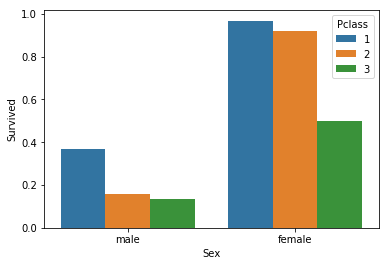

In [5]:
sns.barplot(y='Survived',data=df,x='Sex',hue='Pclass',ci=None)
# 生还率与性别船舱等级的联系 女性远高于男性 船舱等级越高 生还越高

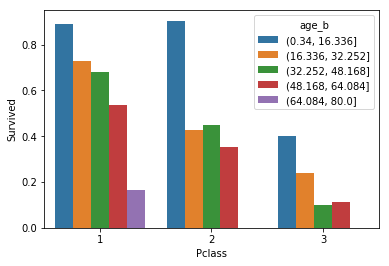

In [6]:
df['age_b']=pd.cut(df.Age,5)
sns.barplot('Pclass','Survived',data=df,hue='age_b',ci=None)
# 年龄段船舱生还率分布

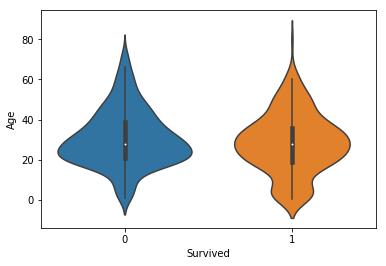

In [7]:
sns.violinplot(y='Age',x='Survived',data=df)
# 遇难年龄主要在20-40，生还也在此同时低龄的也更容易获救

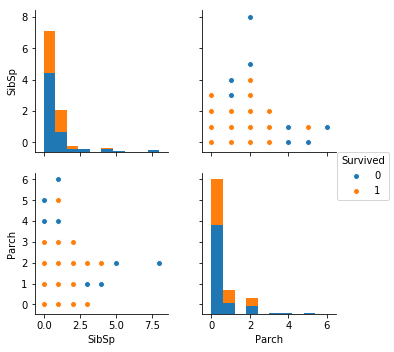

In [8]:
sns.pairplot(vars=['SibSp','Parch'],data=df,kind='scatter',hue='Survived')
# 亲属数量与生还的关系 单身的比亲属多的更容易生还，应该是家人都把生还机会给予了对方

In [9]:
df.isnull().sum()
# 查看数据完整性 船票信息严重缺失  

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
age_b          177
dtype: int64

In [10]:
df['Age'].fillna(df.Age.median(),inplace=True)
df['Embarked'].fillna('S',inplace=True)
# 缺失值处理

In [11]:
dm=pd.concat([df,pd.get_dummies(df[['Sex','Embarked']],drop_first=True)],axis=1)
dm.head()
# 分类类型进行onehot编码

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_b,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]",1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"(32.252, 48.168]",0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]",0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"(32.252, 48.168]",0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"(32.252, 48.168]",1,0,1


In [13]:
from sklearn import preprocessing
scaler=preprocessing.StandardScaler()

In [14]:
dm['Age']=scaler.fit_transform(dm.Age.values.reshape(-1,1),dm.Age.values.reshape(-1,1))
dm['SibSp']=preprocessing.scale(dm.SibSp)
dm['Parch']=preprocessing.scale(dm.Parch)
# 数据预处理

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [15]:
dm.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_b,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.565736,0.432793,-0.473674,A/5 21171,7.2500,NaN,S,"(16.336, 32.252]",1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.663861,0.432793,-0.473674,PC 17599,71.2833,C85,C,"(32.252, 48.168]",0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.258337,-0.474545,-0.473674,STON/O2. 3101282,7.9250,NaN,S,"(16.336, 32.252]",0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,0.433312,0.432793,-0.473674,113803,53.1000,C123,S,"(32.252, 48.168]",0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,0.433312,-0.474545,-0.473674,373450,8.0500,NaN,S,"(32.252, 48.168]",1,0,1


In [16]:
cols=['Pclass','Age','Sex_male','Embarked_Q','Embarked_S','SibSp','Parch']
X=dm[cols]
y=dm['Survived']
# 选取特征集

In [17]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
# 导入模型

In [18]:
knn=KNeighborsClassifier()
cross_val_score(knn,X,y,scoring='accuracy',cv=10)
# 查看得分

array([0.75555556, 0.8       , 0.75280899, 0.7752809 , 0.85393258,
       0.78651685, 0.83146067, 0.7752809 , 0.79775281, 0.78409091])

In [19]:
test=pd.read_csv('test.csv')
test.head()
# 导入测试数据集

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [20]:
test.describe(include='O')
# 查看描述

,Name,Sex,Ticket,Cabin,Embarked
count,418,418,418,91,418
unique,418,2,363,76,3
top,"MacKay, Mr. George William",male,PC 17608,B57 B59 B63 B66,S
freq,1,266,5,3,270


In [21]:
test.isnull().sum()
# 检查缺失数据

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [22]:
pm=pd.concat([test,pd.get_dummies(test[['Sex','Embarked']],drop_first=True)],axis=1)
pm.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_male,Embarked_Q,Embarked_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,1,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1


In [23]:
pm.Age.fillna(test.Age.median(),inplace=True)
pm.Embarked.fillna('S',inplace=True)
pm['Age']=scaler.fit_transform(pm.Age.values.reshape(-1,1),pm.Age.values.reshape(-1,1))
pm['SibSp']=preprocessing.scale(pm.SibSp)
pm['Parch']=preprocessing.scale(pm.Parch)
# 测试数据集预处理

c:\program files\python36\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [26]:
X_test=pm[cols]
knn.fit(X,y)
pred=knn.predict(X_test)
pred

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [27]:
submission=pd.DataFrame({'PassengerId':pm.PassengerId,'Survived':pred})

In [28]:
submission.to_csv('submission.csv',index=False)